## PART TWO - QUESTION BASED


### Question - Explain in depth your strategy to maintain and support the AIML image classifier after it in production.

In [4]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


After any machine learning / AI model is deployed into production there are chances that the models go behave unexpectedly by not producing the same productivity.

This could be due to various reasons. 

1) Change in customer behaviours seasonal and permanant changes

2) In general any machine learning model is trained just using about 10% - 15% of the possible universe of data. In the rapid rate at which the data is growing it would be computationally costly to train on all available data too

3) In certain cases there are scarcity of appropriately labelled data too to provide proper training on our models.

4) Slight change in business requirements based on marketic conditions / strategic decisions.

We also see something called as a **concept drift** which means that the statistical properties of the target variable, which the model is trying to predict, change over time in unforeseen ways. This causes problems because the predictions become less accurate as time passes.

Scoring randomly sampled new data can detect the drift allowing us to trigger the expensive re-label/re-train tasks on an as needed basis.

In case of concept drift not only the model be re-trained, the old data need to be also re-labelled to introduce new class before model re-training

Even in the same flower classification problem initially we may need to class between Iris and Marigold but later we may see the business people using Iris setosa and Iris virginica differently then the Iris in the original training set should be re-labelled as Iris Setosa or Iris Virginica and a new class has to be introduced to train the one among Setosa/Virginca which was not trained on earlier


Considering all these factors we should make sure that proper monitoring and maintenance mechanishms to be in place to make sure we avoid any financial losses / business impacts because of a non performing or adversely impacting incorrect model predictions

**Proposed Architecture for Model Maintenance in Production**

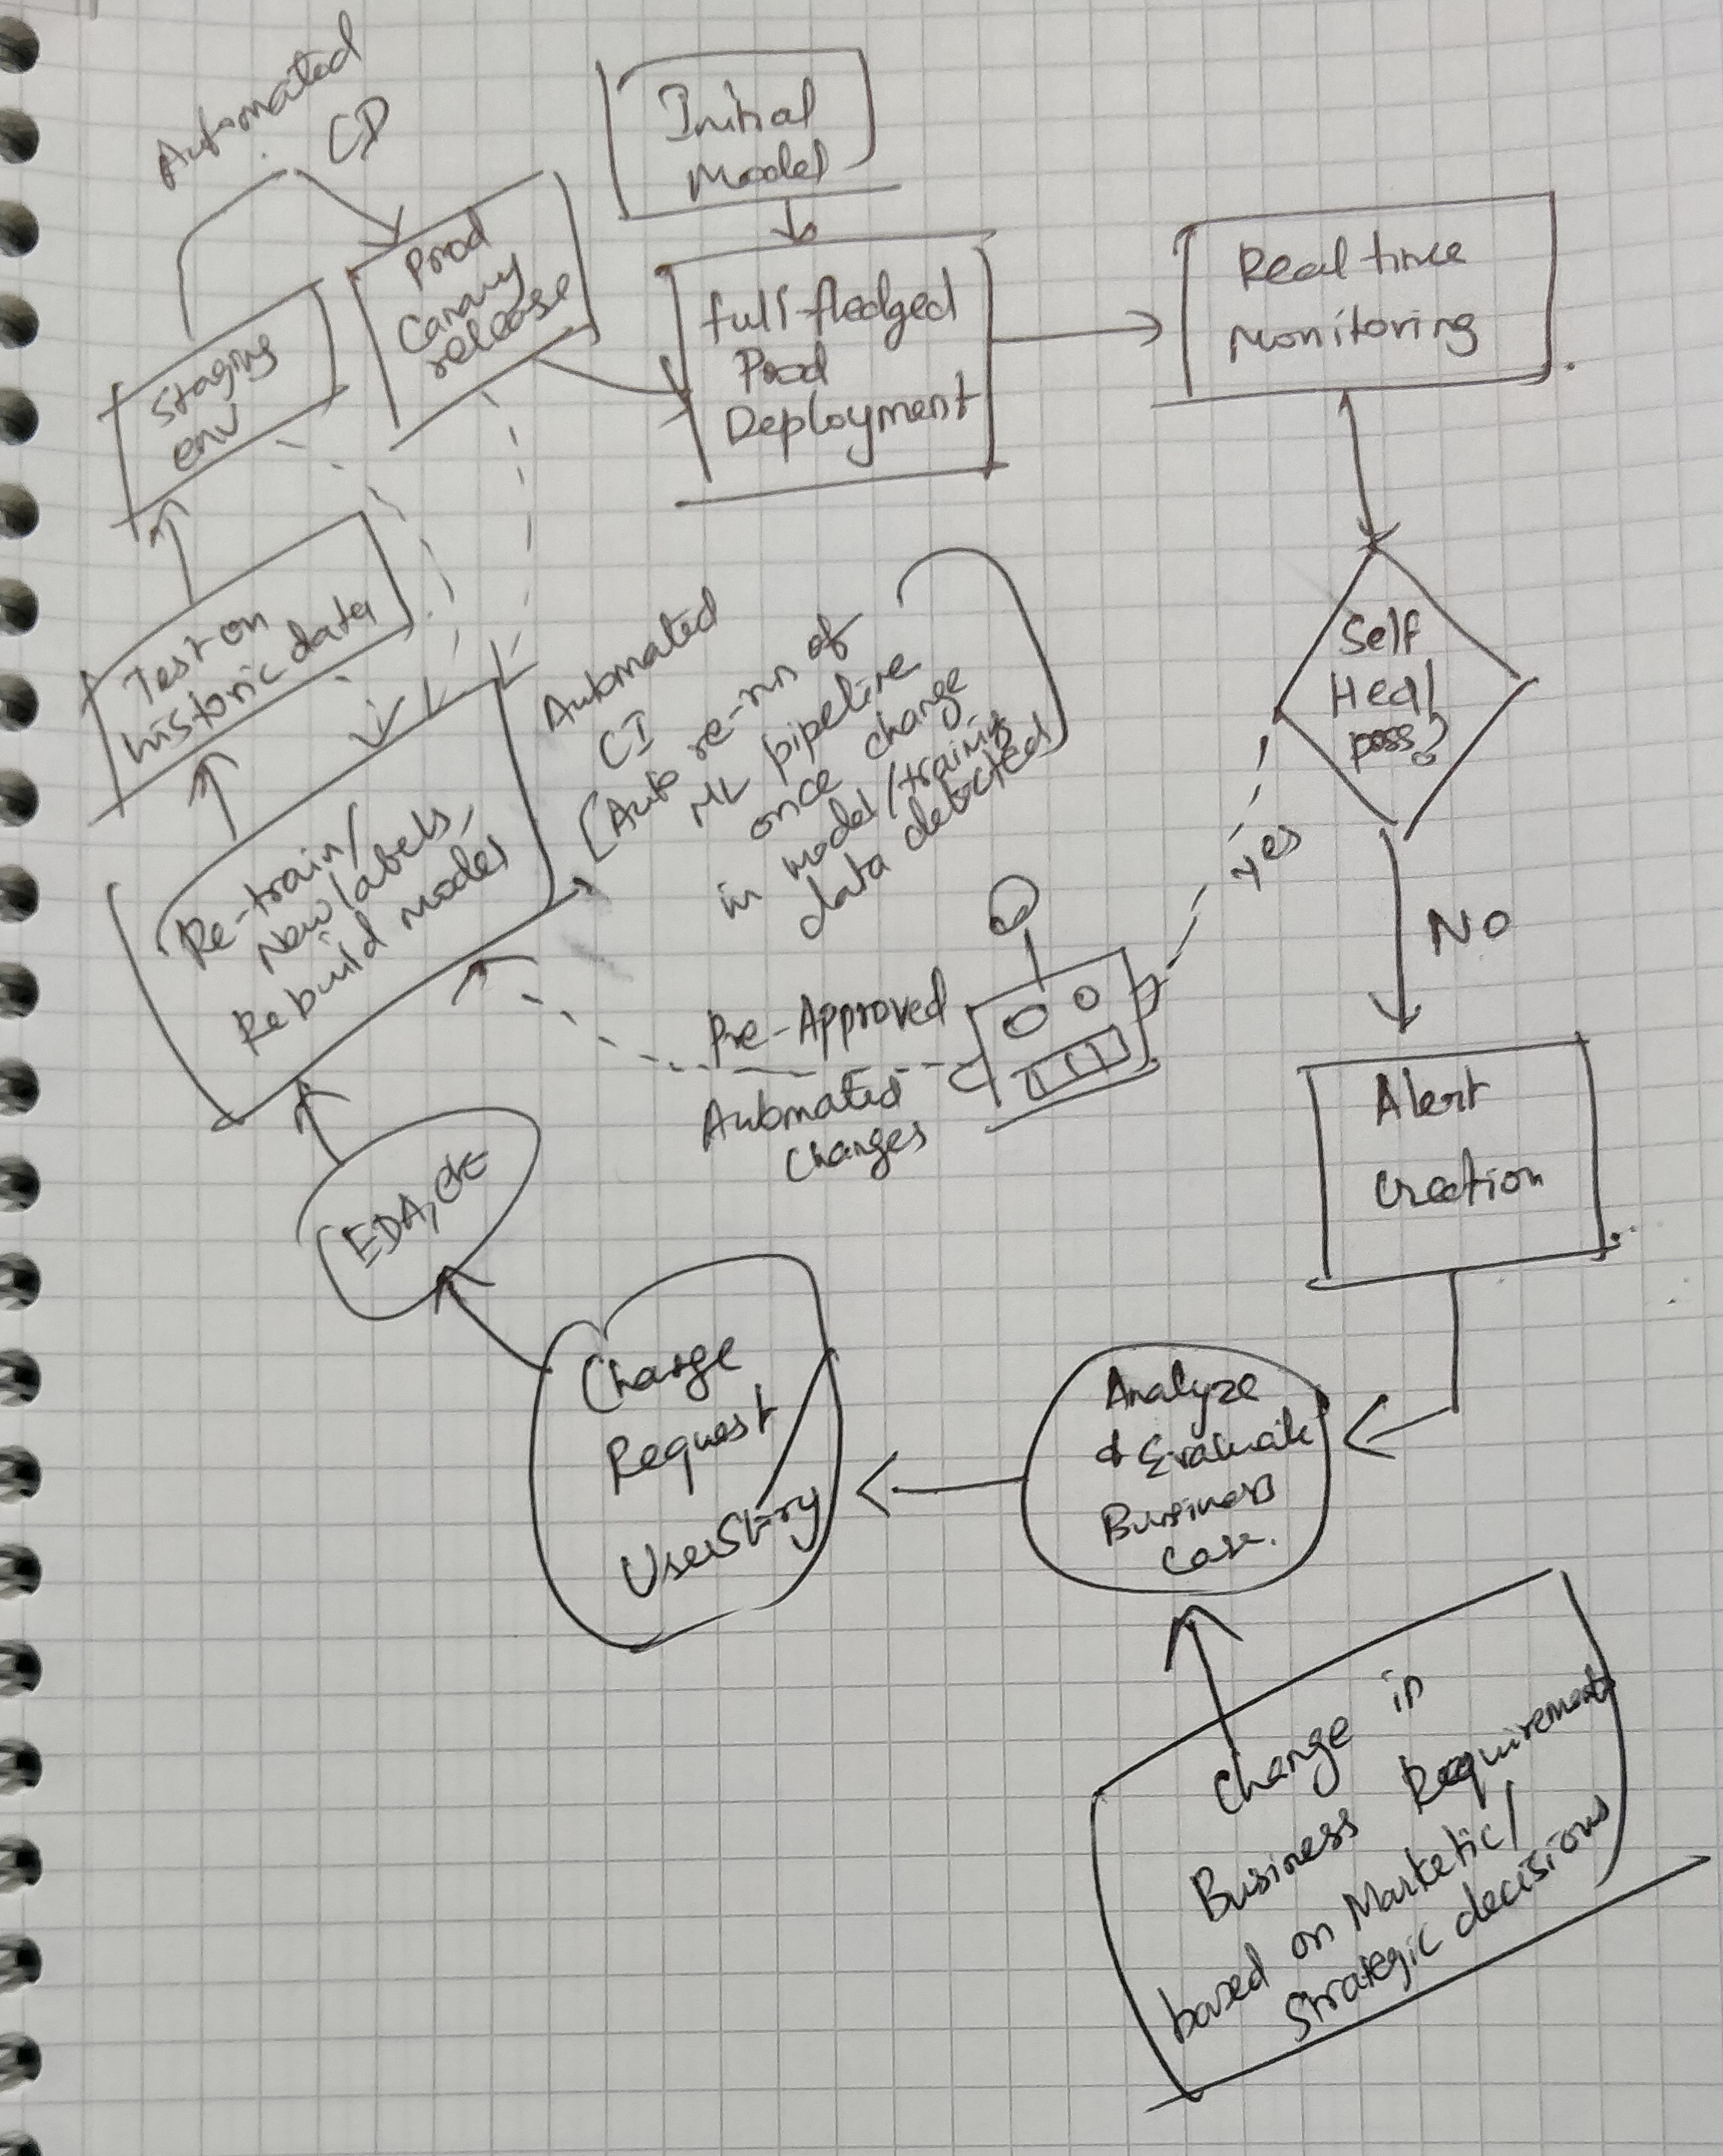

In [11]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/CNN_Project2/ML Model Maintenance.jpg') 

**Monitoring**

Continuous monitoring of the implemented AI or ML model is very important in understanding the model performance as well as from an operational perspective

In general in any applications that are running in production, there would be tools for log aggregation and metrics collection (ex, Elastic Search and Logstash in ELK) we can measure of business KPI, application performance, etc and also there are some visualization tools like Kibana, grafana, Power BI, Tableau where we can visualise the metrics.

The same could also be utilised for monitoring the Machine Learning and AI model performances

**Alerting Mechanism**



Alerting mechanisms are possible in tools like Kibana and also in cloud services. Alerts can be converted into incidents in the ITSM tool as applicable

With the advent and rate at which the cloud services are growing in the market lets focus on cloud services related to ML monitoring also. 

- Like continuously capturing the recall, precision, f1 score, etc and monitoring if there is a sudden drop in any of those parameters
- measure any likelihood of overfitting issue or bias after the model is live (something that was not present during the actual training)


Amazon SageMaker is a fully managed service that enables developers and data scientists to quickly and easily build, train, and deploy ML models at any scale.  Below is the architecture for AWS for the Model Monitoring workflow. 

Reference: https://aws.amazon.com/blogs/machine-learning/monitoring-in-production-ml-models-at-large-scale-using-amazon-sagemaker-model-monitor/

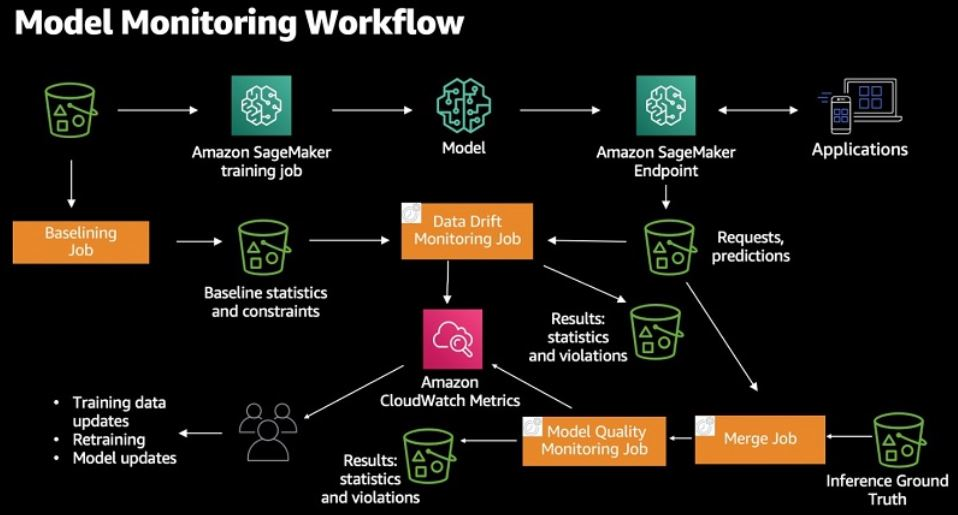

In [7]:
Image(filename='/content/drive/MyDrive/CNN_Project2/AWS Monitor.JPG') 

AWS Model Monitor continuously monitors and detects change in statistical proporties of independent variables, degradation in model performance, unwanted bias, change in feature importances, etc and create alerts accordingly

In addition to the violations, the monitoring schedule also emits Amazon CloudWatch metrics. In this step, you view the metrics generated and set up a CloudWatch alarm to trigger when the model quality drifts from the baseline thresholds. You can also use CloudWatch alarms to trigger remedial actions such as retraining your model or updating the training dataset.

Reports can be visualised in Amazon SageMaker Studio

MLOps

CI/CD framework is important to build, test deploy any software offering the benefits of reproducibility, security and version control. 

MLOps is bringing DevOps best practices into Machine Learning area as well.

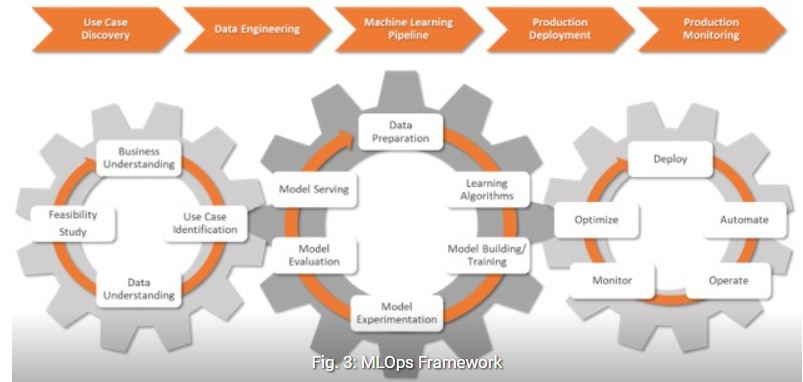

In [19]:
Image(filename='/content/drive/MyDrive/CNN_Project2/MLOps Framework.JPG') 

P.S: Image Courtesy - Analytics Vidhya

link - https://www.analyticsvidhya.com/blog/2020/11/mlops-the-why-and-the-what/

**Continuous Integration**

> We should make sure the Machine Learning Pipeline should automatically get triggered automatically whenever a change in the training data is detected

> Report comparision between the production model and new model should be executed automatically

> New model should also be applied on historic data and analysed for the performance

> Data segments for which the performance is dropping beyond a significant level should be analysed further manually



**Continuous Deployment**

> Allowing model to be deployed and run in the staging environment for few months and be monitored

> Once quality checks are passed in the Staging region, model can be promoted to production as a canary release where we roll out the changes to a limited segment / number of users

> Version control is important to be captured and maintained in some repository along with code, parameters etc for each execution and this should be included in the pull requests 

> Create appropriate reports as applicable


Since we already saw a little about AWS, lets explore the other equivalent cloud service provider - Azure from Microsoft.

https://docs.microsoft.com/en-us/azure/architecture/example-scenario/mlops/mlops-technical-paper illustrates in detail on different view of the ML architectures including Logical Architecture, System Architecture, Batch Processing Architecture along with detailed explanation on MLOps. 

MLOps Process flow diagram from this paper is highlighted below for reference.

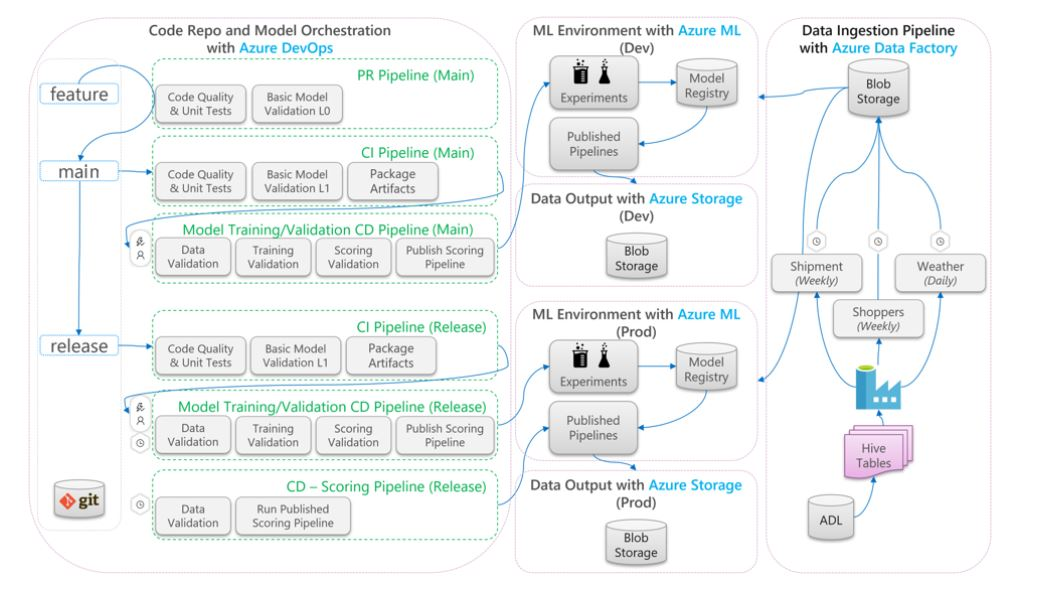

In [15]:
Image(filename='/content/drive/MyDrive/CNN_Project2/MLOps Process flow in Azure.JPG') 